In [ ]:
pip install numpy matplotlib Pillow

##Question 2

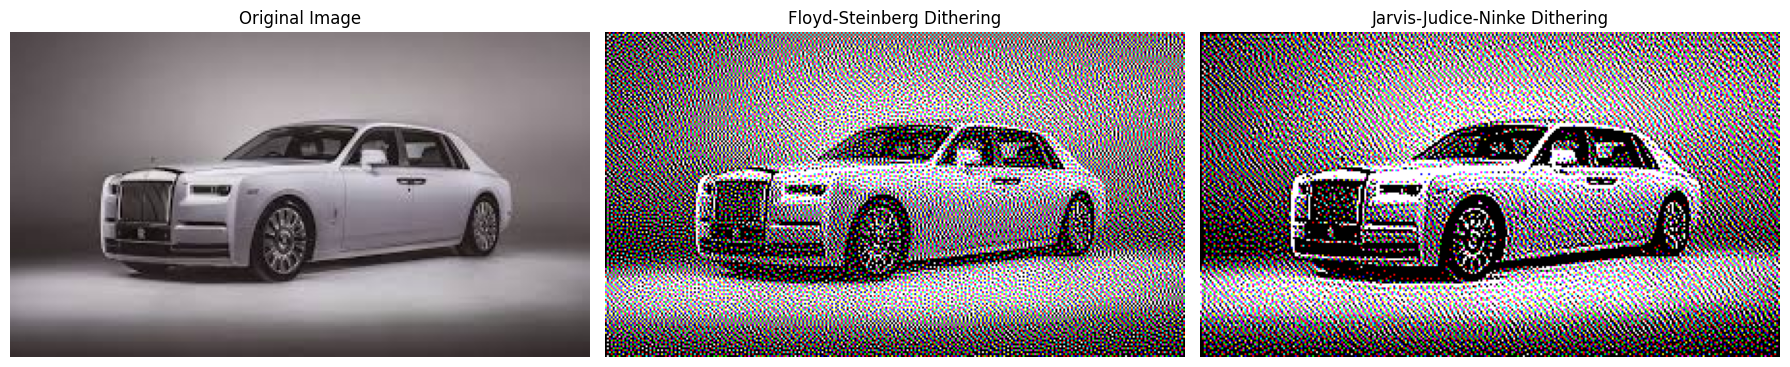

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def floyd_steinberg_dithering(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    pixels = np.array(image, dtype=np.float32)
    height, width, channels = pixels.shape
    dithered = np.zeros_like(pixels, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel > 127)
                dithered[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 16
                if y + 1 < height:
                    if x > 0:
                        pixels[y + 1, x - 1, c] += quant_error * 3 / 16
                    pixels[y + 1, x, c] += quant_error * 5 / 16
                    if x + 1 < width:
                        pixels[y + 1, x + 1, c] += quant_error * 1 / 16
    return Image.fromarray(dithered)
def jarvis_judice_ninke_dithering(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    pixels = np.array(image, dtype=np.float32)
    height, width, channels = pixels.shape
    dithered = np.zeros_like(pixels, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            for c in range(channels):
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel > 127)
                dithered[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 48
                if x + 2 < width:
                    pixels[y, x + 2, c] += quant_error * 5 / 48
                if y + 1 < height:
                    if x - 1 >= 0:
                        pixels[y + 1, x - 1, c] += quant_error * 3 / 48
                    pixels[y + 1, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixels[y + 1, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixels[y + 1, x + 2, c] += quant_error * 1 / 48
                if y + 2 < height:
                    if x - 2 >= 0:
                        pixels[y + 2, x - 2, c] += quant_error * 1 / 48
                    if x - 1 >= 0:
                        pixels[y + 2, x - 1, c] += quant_error * 3 / 48
                    pixels[y + 2, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixels[y + 2, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixels[y + 2, x + 2, c] += quant_error * 1 / 48
    dithered = np.clip(dithered, 0, 255)

    return Image.fromarray(dithered.astype(np.uint8))
image_path = '/content/sample_data/1.jpeg'
original_image = Image.open(image_path).convert('RGB')
floyd_steinberg_result = floyd_steinberg_dithering(original_image)
jarvis_judice_ninke_result = jarvis_judice_ninke_dithering(original_image)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(floyd_steinberg_result)
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(jarvis_judice_ninke_result)
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()


**Floyd-Steinberg** produces smoother gradients and sharper edges with fewer visible dithering artifacts. It's computationally faster due to its simpler error diffusion pattern, making it ideal for high-quality, efficient image processing.

**Jarvis-Judice-Ninke**, on the other hand, creates more pronounced dithering patterns with a grainier, textured appearance. It diffuses the error over a larger area, resulting in more uniform distribution but at the cost of processing speed and potentially blurring fine details.

Floyd-Steinberg is better for cleaner, efficient output, while JJN offers a more artistic, textured result at a higher computational cost

##Question 3

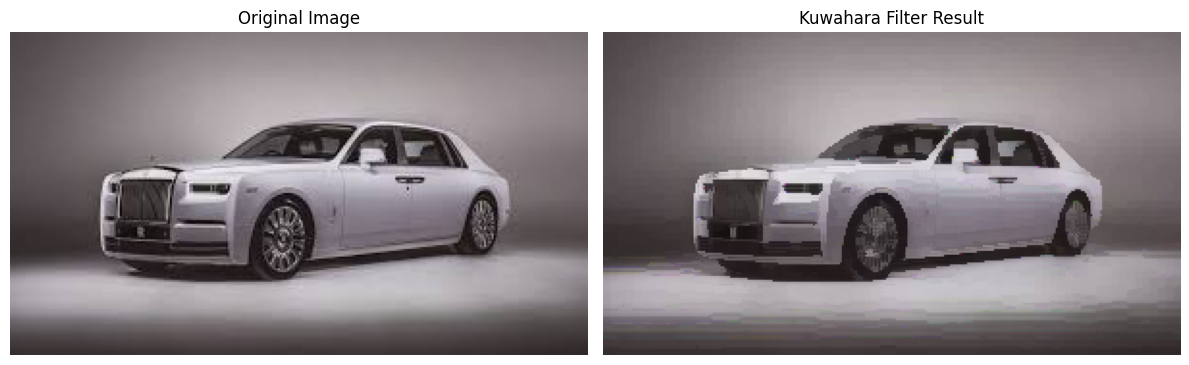

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def kuwahara_filter_color(image, window_size=5):
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    pad_size = window_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    height, width, channels = image.shape

    for c in range(channels):
        for i in range(height):
            for j in range(width):
                region = padded_image[i:i + window_size, j:j + window_size, c]
                q1 = region[:pad_size + 1, :pad_size + 1]
                q2 = region[:pad_size + 1, pad_size:]
                q3 = region[pad_size:, :pad_size + 1]
                q4 = region[pad_size:, pad_size:]
                means = [np.mean(q) for q in [q1, q2, q3, q4]]
                variances = [np.var(q) for q in [q1, q2, q3, q4]]
                min_var_index = np.argmin(variances)
                filtered_image[i, j, c] = means[min_var_index]
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image
image_path = '/content/sample_data/1.jpeg'
original_image = Image.open(image_path).convert('RGB')
original_array = np.array(original_image)
kuwahara_result = kuwahara_filter_color(original_array, window_size=5)
kuwahara_image = Image.fromarray(kuwahara_result)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kuwahara_image)
plt.title('Kuwahara Filter Result')
plt.axis('off')

plt.tight_layout()
plt.show()


The **Kuwahara filter** is a non-linear image smoothing filter designed to reduce noise while preserving edges and details. It works by dividing a neighborhood around each pixel into four overlapping regions, calculating the variance in each region, and replacing the pixel value with the mean of the region with the lowest variance. This method smooths homogeneous areas without blurring edges, making it useful in applications like medical imaging, digital art, and texture analysis.

- **Preserves edges** while reducing noise.
- Divides pixel neighborhood into **four regions**.
- Replaces pixel value with the **mean of the least varied region**.

##Question 4

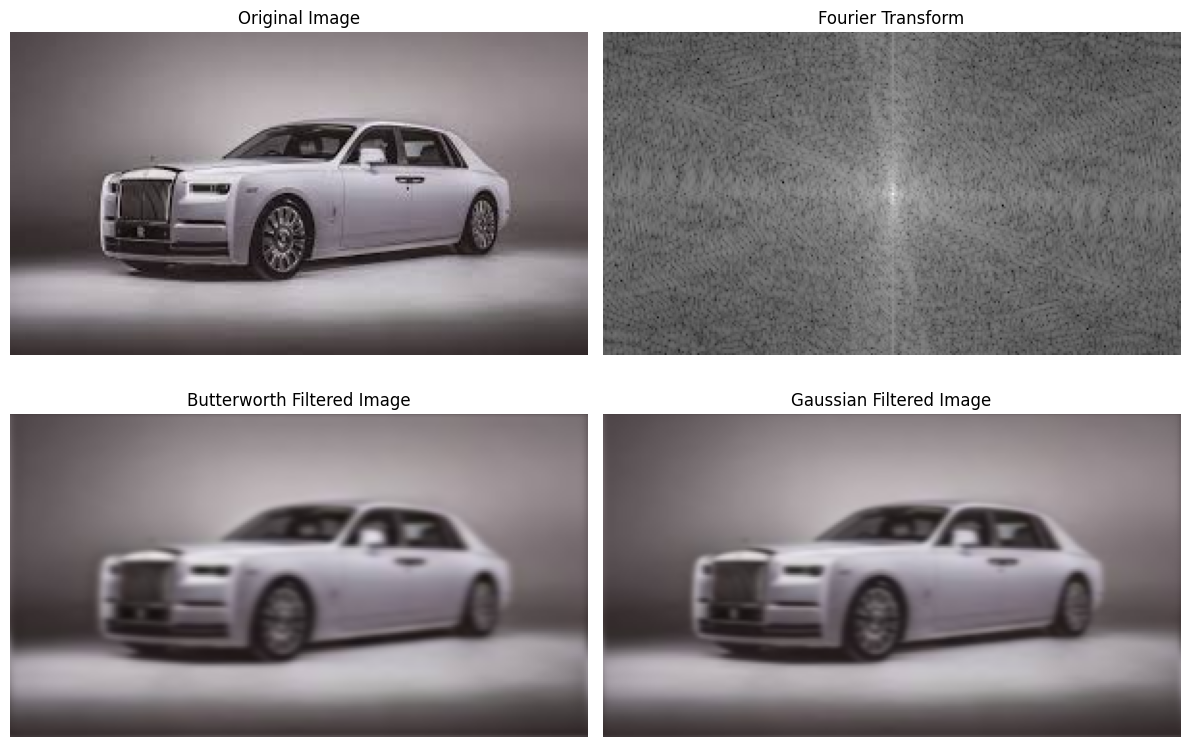

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def butterworth_filter(shape, cutoff, order=2):
    P, Q = shape
    x = np.linspace(-Q / 2, Q / 2 - 1, Q)
    y = np.linspace(-P / 2, P / 2 - 1, P)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_filter_shape(shape, cutoff):
    P, Q = shape
    x = np.linspace(-Q / 2, Q / 2 - 1, Q)
    y = np.linspace(-P / 2, P / 2 - 1, P)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

def apply_filter_fft(image_array, filter_kernel):
    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    filtered_shifted = f_transform_shifted * filter_kernel
    filtered_ifft = np.fft.ifftshift(filtered_shifted)
    inverse_transform = np.fft.ifft2(filtered_ifft)
    filtered_image = np.abs(inverse_transform)
    return filtered_image

# Load the image
image_path = '/content/sample_data/1.jpeg'
original_image = Image.open(image_path).convert('RGB')
original_array = np.array(original_image)

butter_filtered_channels = []
gaussian_filtered_channels = []
cutoff_frequency = 30
filter_order = 2

# Apply filters to each color channel
for channel in range(3):
    channel_data = original_array[:, :, channel]
    butter_filter_kernel = butterworth_filter(channel_data.shape, cutoff_frequency, filter_order)
    gaussian_filter_kernel = gaussian_filter_shape(channel_data.shape, cutoff_frequency)

    butter_filtered = apply_filter_fft(channel_data, butter_filter_kernel)
    butter_filtered_channels.append(butter_filtered)

    gaussian_filtered = apply_filter_fft(channel_data, gaussian_filter_kernel)
    gaussian_filtered_channels.append(gaussian_filtered)

# Stack filtered channels into RGB images
butter_filtered_rgb = np.stack(butter_filtered_channels, axis=2)
butter_filtered_rgb = np.clip(butter_filtered_rgb, 0, 255).astype(np.uint8)

gaussian_filtered_rgb = np.stack(gaussian_filtered_channels, axis=2)
gaussian_filtered_rgb = np.clip(gaussian_filtered_rgb, 0, 255).astype(np.uint8)

butter_image = Image.fromarray(butter_filtered_rgb)
gaussian_image = Image.fromarray(gaussian_filtered_rgb)

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Fourier Transform of the original image
f_transform_original = np.fft.fftshift(np.fft.fft2(original_array[:, :, 0]))
magnitude_spectrum = np.log(1 + np.abs(f_transform_original))

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(butter_image)
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_image)
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
